In [42]:
import os, shutil, io, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap, Normalize
from ase.io import write, read
from ase.build import sort, make_supercell
from scipy.optimize import minimize
from ase.units import kB
from scipy.interpolate import UnivariateSpline

import SpinMC

In [50]:
n_cells = 40

# Read primitive structure
prim_struc = read('/home/common/akram/QMC/mc_spin/POSCAR_V_T-VSe2-conv')
# Make supercell
super_struc = make_supercell(prim_struc, np.array([[n_cells, 0, 0], [0, round(n_cells/3**.5), 0], [0, 0, 1]]))

num_spins = len(super_struc)
num_spins

1840

In [57]:
base_directory = "undistorted"
base_directory = "cdw"
base_directory = "strain/strain_mc"

# Define the temperature indices
if base_directory == 'cdw':
    temperature_indices = list(range(5, 155, 5)) 
elif base_directory == "undistorted":
    temperature_indices = list(range(5, 355, 5))
elif base_directory == "strain/strain_mc":
    temperature_indices = list(range(10, 460, 10))    

### The ensemble magnetizations are saved as 3d magnetization vectors normalized by number of spins.

In [58]:
# Initialize lists to store the calculated values for plotting
magnitudes_mean = []
magnitudes_std = []
specific_heats = []
temperature_indices_tmp = []

for T in temperature_indices:
    
    try:
        # Load the magnetization data from the file
        ensemble_magnetizations = np.load(
            f'/home/common/akram/QMC/mc_spin/paper/{base_directory}/{T}/spin_configs/ensemble_magnetizations_T{T}.npy')

        # Load the magnetization data from the file
        ensemble_energies = np.load(
            f'/home/common/akram/QMC/mc_spin/paper/{base_directory}/{T}/energies/ensemble_energies_T{T}.npy')

        # Calculate magnetization magnitudes
        squared_magnetizations = np.sum(np.square(ensemble_magnetizations), axis=1)
        magnitudes_mean.append(np.mean(squared_magnetizations))
        magnitudes_std.append(np.std(squared_magnetizations))
        ###

        # Calculate specific heats
        expected_energy = np.mean(ensemble_energies)
        expected_square_energy = np.mean(np.square(ensemble_energies))
        specific_heat = (expected_square_energy - expected_energy ** 2) / (num_spins * (kB* T) ** 2)
        specific_heats.append(specific_heat)
        
        ##
        # Calculate the mean magnetization vector
        mean_magnetization_vector = np.mean(ensemble_magnetizations, axis=0)
        
        temperature_indices_tmp.append(T)
    except:
        print(T)
        Exception

### Undistorted plot

228.03030303030303


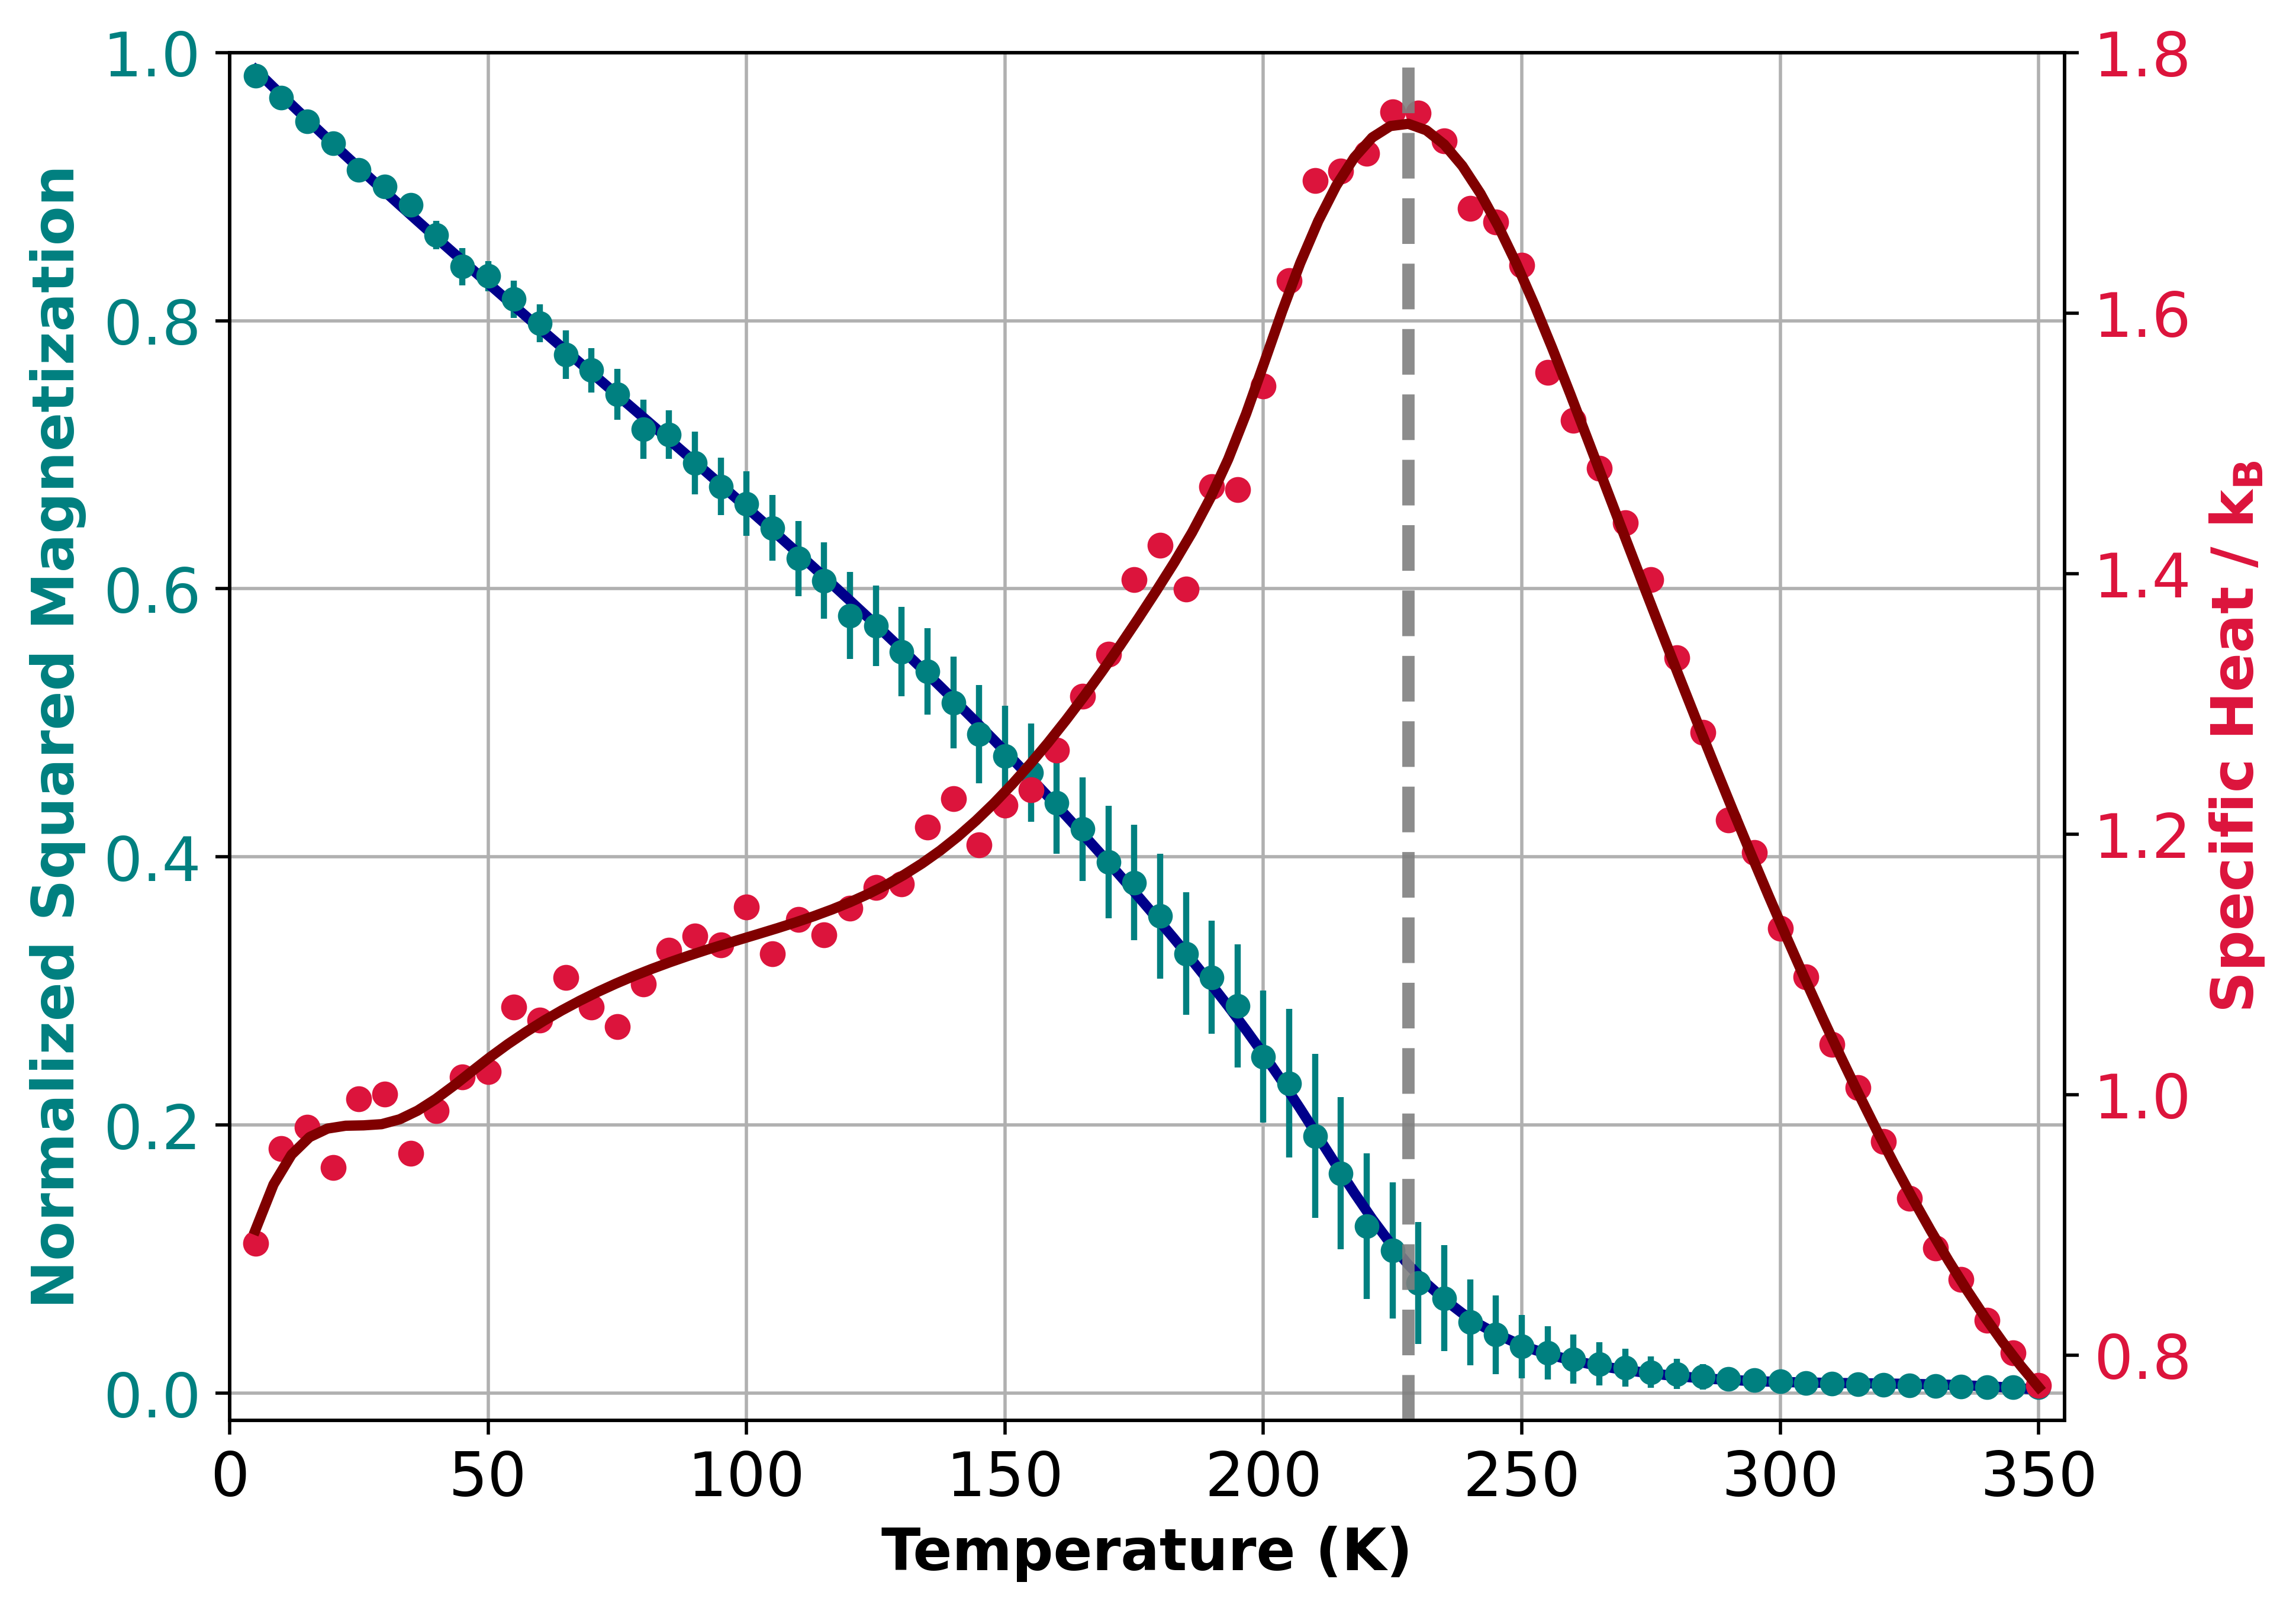

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Assuming temperature_indices_tmp, magnitudes_mean, magnitudes_std, and specific_heats are defined

# Create spline fits for both magnetization and specific heat
spline_magnetization = UnivariateSpline(temperature_indices_tmp, magnitudes_mean, s=0.001)
fit_temperatures = np.linspace(min(temperature_indices_tmp), max(temperature_indices_tmp), 100)
fit_magnetizations = spline_magnetization(fit_temperatures)

spline_specific_heat = UnivariateSpline(temperature_indices_tmp, specific_heats, s=0.02)
fit_specific_heats = spline_specific_heat(fit_temperatures)

# Find the temperature at which the specific heat is maximum
max_specific_heat_temp = fit_temperatures[np.argmax(fit_specific_heats)]

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=500)

# Magnetization plot
color = 'teal'
ax1.set_xlabel('Temperature (K)', fontsize=14, weight='bold')
ax1.set_ylabel('Normalized Squared Magnetization', fontsize=14, color=color, weight='bold')
ax1.errorbar(temperature_indices_tmp, magnitudes_mean, yerr=magnitudes_std, 
             fmt='o', markersize=5, linestyle='', color=color, label='Squared Magnetization with Uncertainty')
ax1.plot(fit_temperatures, fit_magnetizations, 
         label='Spline Fit - Magnetization', color='darkblue', linewidth=2.5)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)  # Increased font size for y-axis numbers
ax1.tick_params(axis='x', labelsize=15)  # Increased font size for x-axis numbers
ax1.grid(True)
ax1.set_ylim(-0.02, 1.0)
ax1.set_xlim(0, 355)

# Specific heat plot on the same figure but with a separate y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'crimson'
ax2.set_ylabel(r'$\mathbf{Specific\ Heat\ / \ k_B}$', fontsize=14, color=color)
ax2.scatter(temperature_indices_tmp, specific_heats, 
         marker='o', s=28, color=color, label='Specific Heat Data')  # Changed to scatter
ax2.plot(fit_temperatures, fit_specific_heats, 
         label='Spline Fit - Specific Heat', color='maroon', linewidth=2.5)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)  # Increased font size for y-axis numbers
ax2.set_ylim(0.75, 1.8)  # Set y-axis limit for specific heat
ax2.set_xlim(0, 355)

# Add a thin vertical stripe around the maximum specific heat
ylim = ax2.get_ylim()
ax2.axvline(x=max_specific_heat_temp, color='grey', linestyle='--', alpha=0.9, linewidth=3)

print(max_specific_heat_temp)

# Show the plot
plt.savefig('undistorted.png')


### CDW plot

67.97979797979798


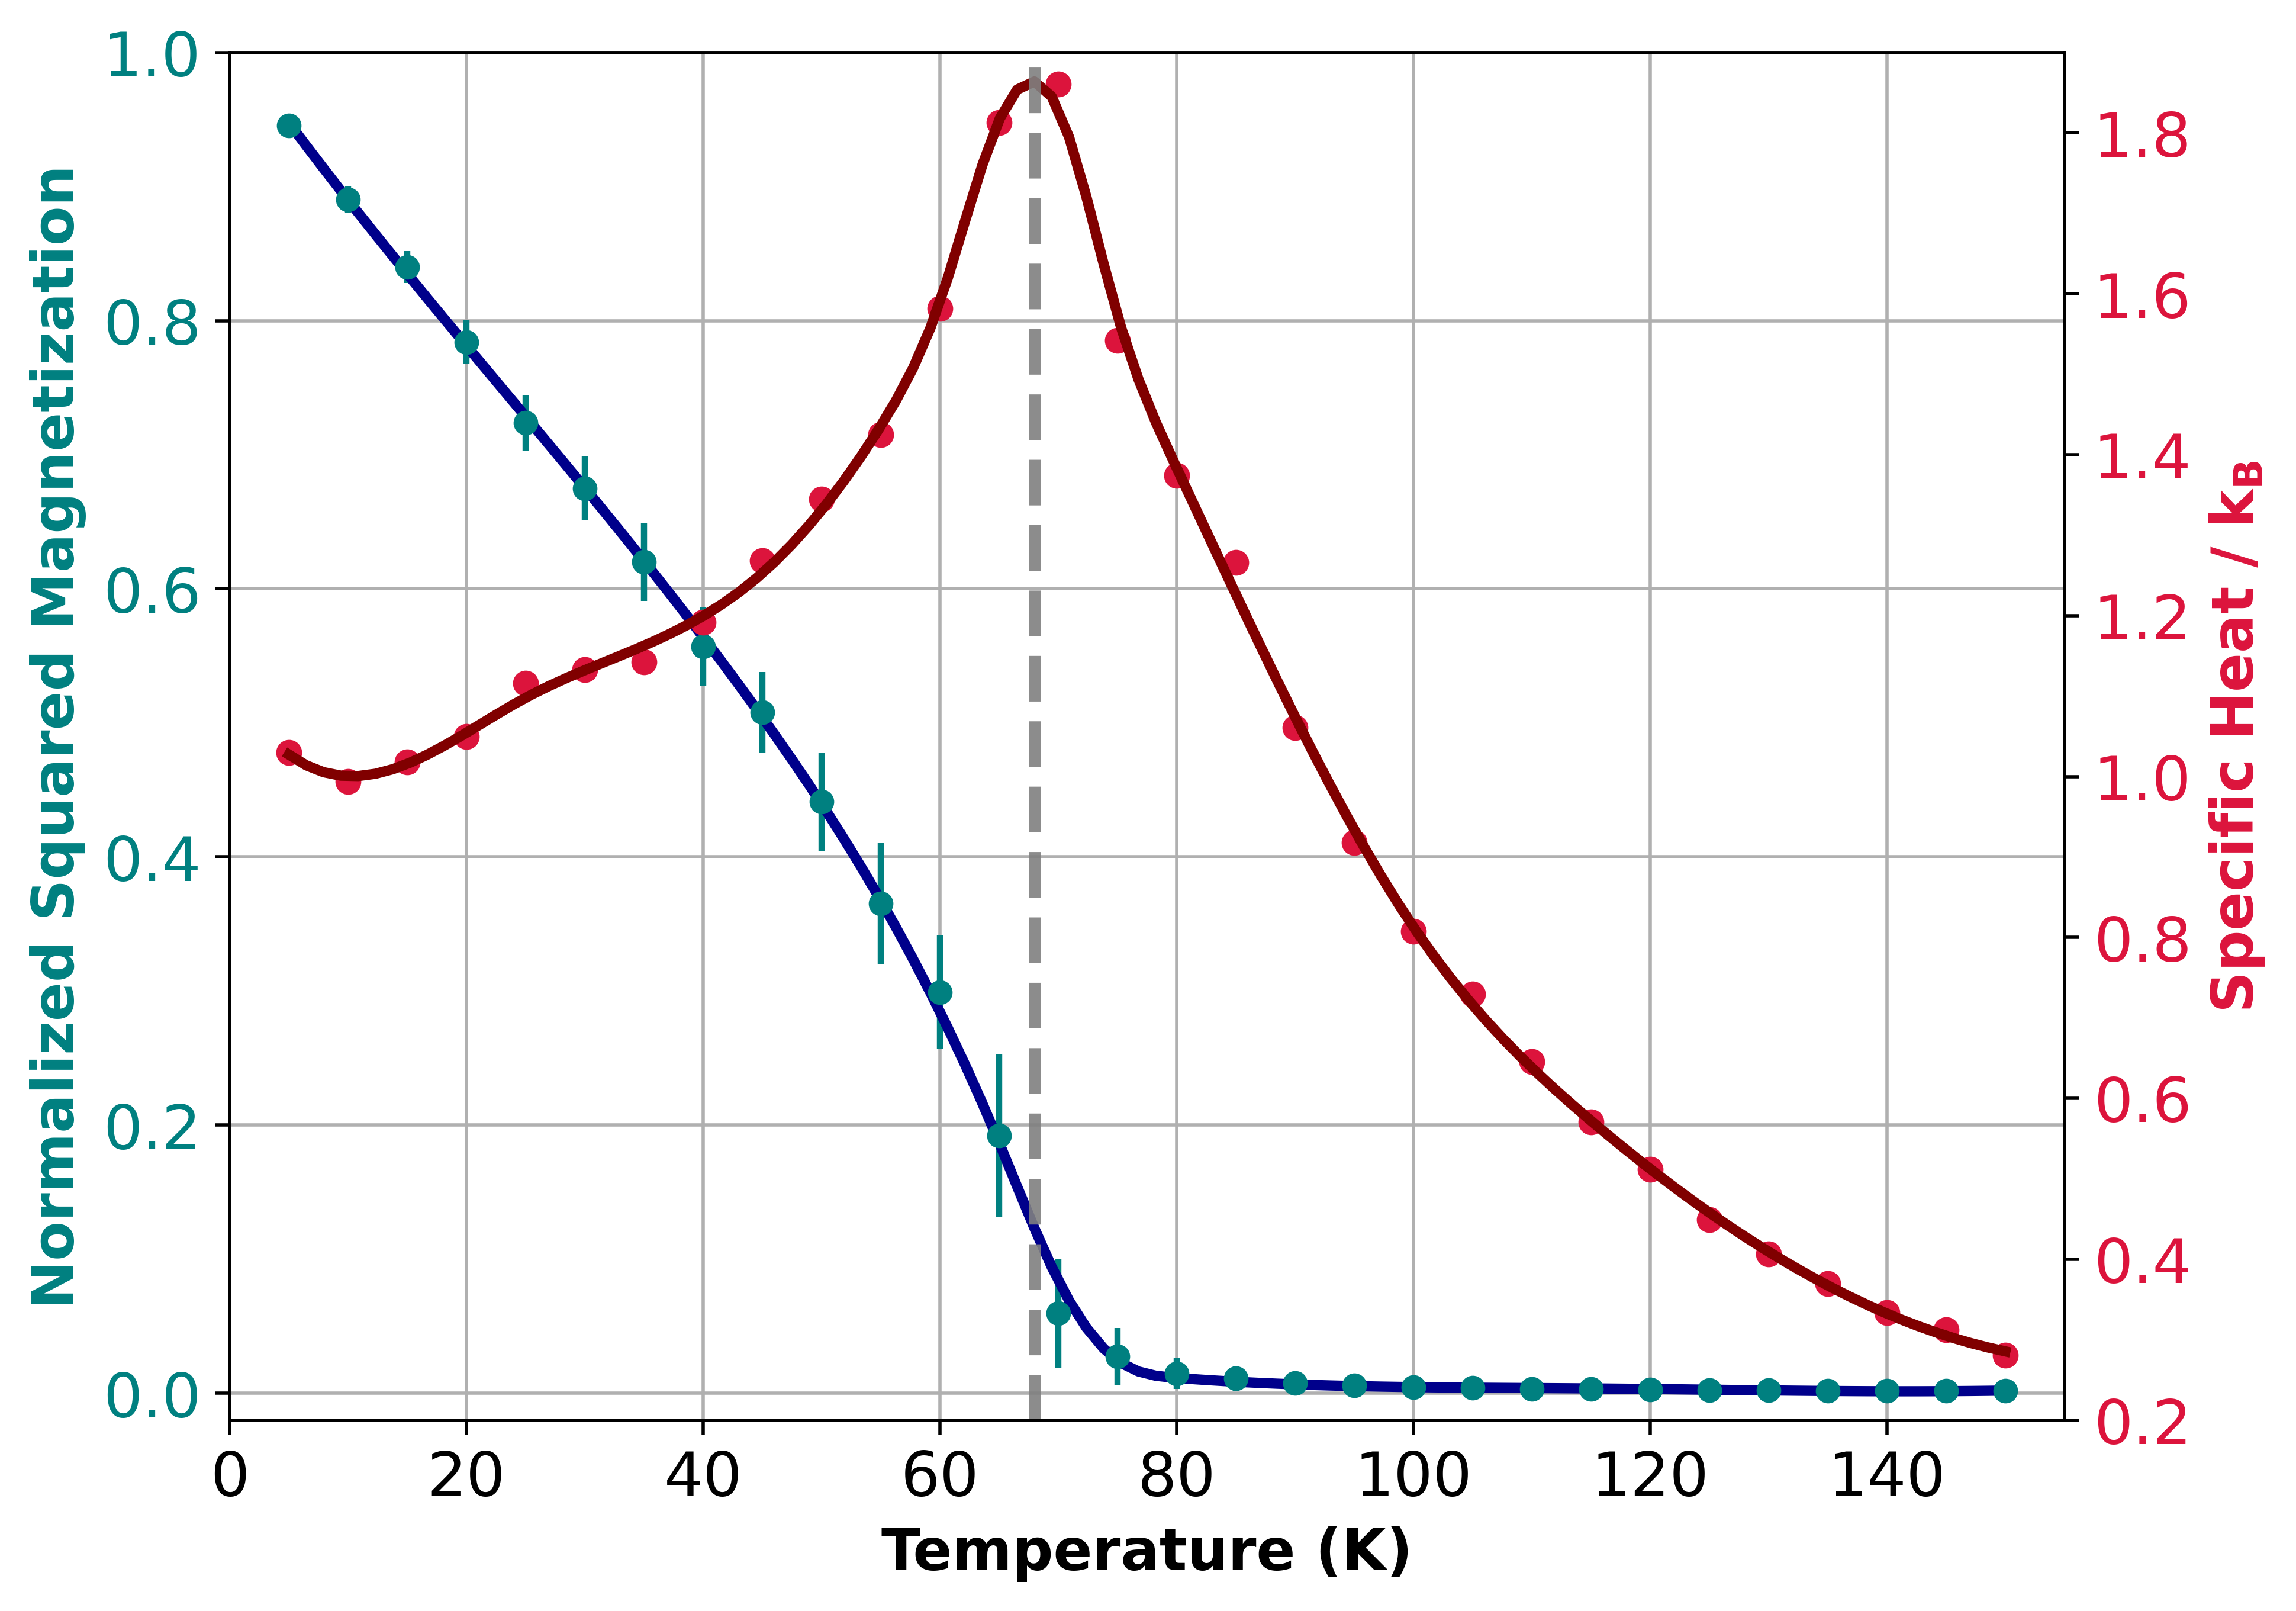

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Assuming temperature_indices_tmp, magnitudes_mean, magnitudes_std, and specific_heats are defined

# Create spline fits for both magnetization and specific heat
spline_magnetization = UnivariateSpline(temperature_indices_tmp, magnitudes_mean, s=0.001)
fit_temperatures = np.linspace(min(temperature_indices_tmp), max(temperature_indices_tmp), 100)
fit_magnetizations = spline_magnetization(fit_temperatures)

spline_specific_heat = UnivariateSpline(temperature_indices_tmp, specific_heats, s=0.006)
fit_specific_heats = spline_specific_heat(fit_temperatures)

# Find the temperature at which the specific heat is maximum
max_specific_heat_temp = fit_temperatures[np.argmax(fit_specific_heats)]

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 6), dpi=500)

# Magnetization plot
color = 'teal'
ax1.set_xlabel('Temperature (K)', fontsize=14, weight='bold')
ax1.set_ylabel('Normalized Squared Magnetization', fontsize=14, color=color, weight='bold')
ax1.errorbar(temperature_indices_tmp, magnitudes_mean, yerr=magnitudes_std, 
             fmt='o', markersize=5, linestyle='', color=color, label='Squared Magnetization with Uncertainty')
ax1.plot(fit_temperatures, fit_magnetizations, 
         label='Spline Fit - Magnetization', color='darkblue', linewidth=2.5)
ax1.tick_params(axis='y', labelcolor=color, labelsize=15)  # Increased font size for y-axis numbers
ax1.tick_params(axis='x', labelsize=15)  # Increased font size for x-axis numbers
ax1.grid(True)
ax1.set_ylim(-0.02, 1.0)
ax1.set_xlim(0, 155)

# Specific heat plot on the same figure but with a separate y-axis
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'crimson'
ax2.set_ylabel(r'$\mathbf{Specific\ Heat\ / \ k_B}$', fontsize=14, color=color)
ax2.scatter(temperature_indices_tmp, specific_heats, 
         marker='o', s=28, color=color, label='Specific Heat Data')  # Changed to scatter
ax2.plot(fit_temperatures, fit_specific_heats, 
         label='Spline Fit - Specific Heat', color='maroon', linewidth=2.5)
ax2.tick_params(axis='y', labelcolor=color, labelsize=15)  # Increased font size for y-axis numbers
ax2.set_ylim(0.2, 1.9)  # Set y-axis limit for specific heat
ax2.set_xlim(0, 155)

# Add a thin vertical stripe around the maximum specific heat
ylim = ax2.get_ylim()
ax2.axvline(x=max_specific_heat_temp, color='grey', linestyle='--', alpha=0.9, linewidth=3)  # Vertical dashed line

print(max_specific_heat_temp)

# Show the plot
plt.savefig('cdw.png')
